# Pareto Strikers
###### Alberto Benavides

<hr>

En este proyecto se muestran las mejores combinaciones de jugadores para el [Mario Strikers™: Battle League](https://www.nintendo.com/es-mx/store/products/mario-strikers-battle-league-switch/) a partir del uso del frente de Pareto.

## Paquetes

Se usa Python como lenguaje de programación, Jupyter Lab como entorno de desarrollo y los siguientes paquetes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from itertools import combinations
import numpy as np

## Carga de datos
Se extraen los datos de los personajes de [Super Mario Wiki](https://www.mariowiki.com/Mario_Strikers:_Battle_League). Faltan los datos de los personajes con accesorios. No los encontré.

In [2]:
# https://www.mariowiki.com/Mario_Strikers:_Battle_League
d = [
      {
      'name' : 'mario',
      'strength' : 11,
      'speed' : 12,
      'shooting' : 14,
      'passing' : 10,
      'technique' : 16
      },
      {
      'name' : 'luigi',
      'strength' : 11,
      'speed' : 11,
      'shooting' : 10,
      'passing' : 14,
      'technique' : 17
      },
      {
      'name' : 'bowser',
      'strength' : 17,
      'speed' : 9,
      'shooting' : 17,
      'passing' : 11,
      'technique' : 9
      },
      {
      'name' : 'peach',
      'strength' : 9,
      'speed' : 17,
      'shooting' : 9,
      'passing' : 13,
      'technique' : 15
      },
      {
      'name' : 'rosalina',
      'strength' : 14,
      'speed' : 9,
      'shooting' : 17,
      'passing' : 10,
      'technique' : 13
      },
      {
      'name' : 'toad',
      'strength' : 9,
      'speed' : 17,
      'shooting' : 11,
      'passing' : 15,
      'technique' : 11
      },
      {
      'name' : 'yoshi',
      'strength' : 10,
      'speed' : 10,
      'shooting' : 17,
      'passing' : 17,
      'technique' : 9
      },
      {
      'name' : 'dk',
      'strength' : 16,
      'speed' : 9,
      'shooting' : 13,
      'passing' : 16,
      'technique' : 9
      },
      {
      'name' : 'wario',
      'strength' : 17,
      'speed' : 9,
      'shooting' : 15,
      'passing' : 13,
      'technique' : 9
      },
      {
      'name' : 'waluigi',
      'strength' : 15,
      'speed' : 16,
      'shooting' : 9,
      'passing' : 9,
      'technique' : 14
      }
]
df = pd.DataFrame(d)
df.set_index('name', inplace=True)

### Caracterísiticas por personaje

Este es la información cargada. Colores blancos son valores bajos. Mientras más verde y obscuro, más alto.

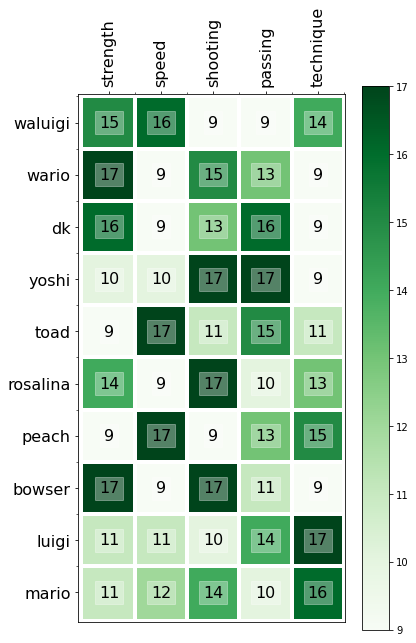

In [3]:
plt.figure(figsize=(6,10))
plt.imshow(df, cmap='Greens')
plt.yticks(ticks=range(len(df)), labels=df.index, fontsize=16)
plt.xticks(ticks=range(len(df.columns)), labels=list(df.columns), rotation= 90, fontsize=16)
plt.xlim(-0.6, len(df.columns) - 0.47)
plt.ylim(-0.57, len(df) - 0.45)
# https://stackoverflow.com/a/3376856
#plt.clim(0, 18)
plt.colorbar()

for y in range(len(df)):
  for x in range(len(df.columns)):
    plt.text(x, y, df.iloc[y, x],
      horizontalalignment='center',
      verticalalignment='center',
      fontsize=16,
      backgroundcolor='#FFF5',
      c = 'k'
    )

#https://stackoverflow.com/a/38994970
ax = plt.gca();

# Minor ticks
ax.set_xticks(np.arange(0.5, len(df.columns), 1), minor=True)
ax.set_yticks(np.arange(0.5, len(df), 1), minor=True)

# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=4)

#https://stackoverflow.com/questions/14406214/moving-x-axis-to-the-top-of-a-plot-in-matplotlib
ax.xaxis.tick_top()

## Equipos

Ahora, se hacen combinaciones para generar los equipos de cuatro integrantes cada uno. En esencia, se hacen todos los equipos posibles con los personajes disponibles. Se muestran los primeros diez equipos como ejemplo.

In [4]:
comb = list(combinations(df.index, 4))
pd.DataFrame(comb)

,0,1,2,3
0,mario,luigi,bowser,peach
1,mario,luigi,bowser,rosalina
2,mario,luigi,bowser,toad
3,mario,luigi,bowser,yoshi
4,mario,luigi,bowser,dk
...,...,...,...,...
205,toad,yoshi,dk,wario
206,toad,yoshi,dk,waluigi
207,toad,yoshi,wario,waluigi
208,toad,dk,wario,waluigi


Ahora, por equipo, se calcula el promedio de fuerza, velocidad, tiro, pase y técnica y se agregan a cada equipo. Agregada como referencia una muestra de diez equipos.

In [5]:
d = []
for c in comb:
  # https://stackoverflow.com/a/60085608
  t = df.iloc[np.where(df.index.isin(c))].mean()
  d.append({
    'team' : ','.join(c),
    'strength' : t.strength,
    'speed' : t.speed,
    'shooting' : t.shooting,
    'passing' : t.passing,
    'technique' : t.technique,
  })
df_teams = pd.DataFrame(d)
df_teams.set_index('team', inplace=True)
df_teams.sample(10)

,strength,speed,shooting,passing,technique
team,,,,,
"luigi,peach,toad,dk",11.25,13.50,10.75,14.50,13.00
"peach,yoshi,dk,wario",13.00,11.25,13.50,14.75,10.50
"rosalina,toad,dk,waluigi",13.50,12.75,12.50,12.50,11.75
"luigi,yoshi,dk,waluigi",13.00,11.50,12.25,14.00,12.25
"mario,bowser,peach,yoshi",11.75,12.00,14.25,12.75,12.25
"mario,yoshi,dk,waluigi",13.00,11.75,13.25,13.00,12.00
"mario,peach,dk,waluigi",12.75,13.50,11.25,12.00,13.50
"luigi,bowser,peach,toad",11.50,13.50,11.75,13.25,13.00
"bowser,rosalina,toad,dk",14.00,11.00,14.50,13.00,10.50


## Pareto

El [frente de Pareto](https://en.wikipedia.org/wiki/Pareto_front) se utiliza para encontrar valores óptimos en problemas de optimización multiobjetivo. En otras palabras y para este caso, nos servirá para elegir los equipos con mejores características de entre todos los equipos disponibles.

In [6]:
# https://stackoverflow.com/a/40239615
def pareto_frontier(costs, max_val = True):
  """
  Find the pareto-efficient points
  :param costs: An (n_points, n_costs) array
  :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
  """
  is_efficient = np.ones(costs.shape[0], dtype = bool)
  for i, c in enumerate(costs):
    if is_efficient[i]:
      if max_val:
        is_efficient[is_efficient] = np.any(costs[is_efficient] > c, axis=1)  # Keep any point with a lower cost
      else:
        is_efficient[is_efficient] = np.any(costs[is_efficient] < c, axis=1)  # Keep any point with a lower cost
      is_efficient[i] = True  # And keep self
  return is_efficient

### Ejemplo
Para aclarar esto, supongamos que nos interesan los equipo más rápidos y con mejor tiros. La representación gráfica de esto se muestra en el siguiente diagrama de dispersión en el que aparecen en rojo los mejores equipos con base en estas características.

In [12]:
pareto_front = pareto_frontier(df_teams[['speed', 'shooting']].to_numpy())
df_teams['pareto'] = list(pareto_front)
df_teams_pareto = df_teams[df_teams.pareto]
df_teams_pareto = df_teams_pareto.drop(columns='pareto')

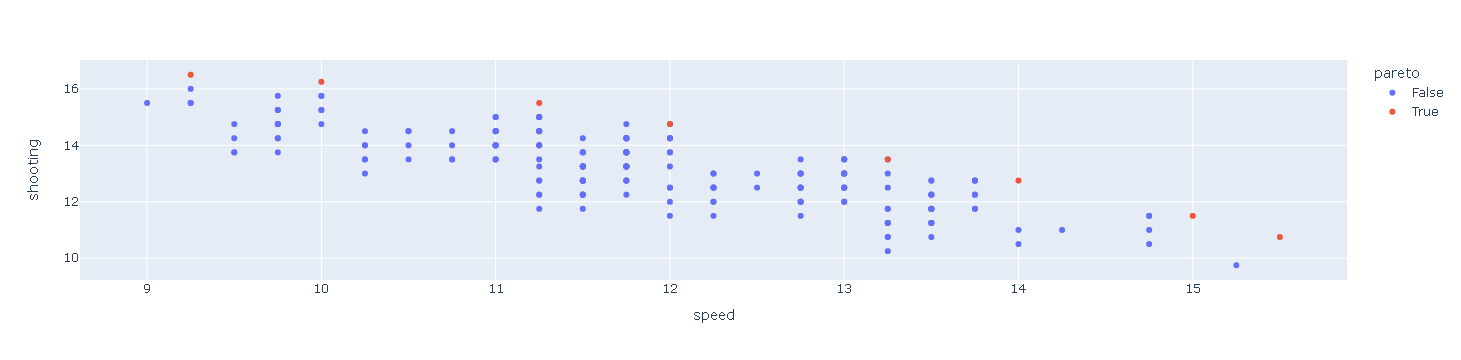

In [13]:
f1 = px.scatter(df_teams, x='speed', y='shooting', color='pareto', hover_data=[df_teams.index])
f1.show()

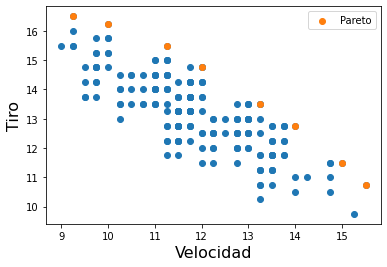

In [20]:
plt.figure()
plt.scatter(df_teams['speed'], df_teams['shooting'])
plt.scatter(df_teams_pareto['speed'], df_teams_pareto['shooting'], label='Pareto')
plt.xlabel('Velocidad', fontsize=16)
plt.ylabel('Tiro', fontsize=16)
plt.legend()
plt.show()

Dichos equipos se muestran a continuación, ordenados por mejores tiro y velocidad, en esa prioridad, para que coincidan con los valores de la gráfica inmediata anterior vistos de arriba a abajo y de izquierda a derecha.

In [9]:
df_teams_pareto.sort_values(['shooting', 'speed'], ascending=False)

,strength,speed,shooting,passing,technique
team,,,,,
"bowser,rosalina,yoshi,wario",14.50,9.25,16.50,12.75,10.00
"mario,bowser,rosalina,yoshi",13.00,10.00,16.25,12.00,11.75
"bowser,rosalina,toad,yoshi",12.50,11.25,15.50,13.25,10.50
"mario,bowser,toad,yoshi",11.75,12.00,14.75,13.25,11.25
"bowser,peach,toad,yoshi",11.25,13.25,13.50,14.00,11.00
"mario,peach,toad,yoshi",9.75,14.00,12.75,13.75,12.75
"peach,toad,yoshi,waluigi",10.75,15.00,11.50,13.50,12.25
"mario,peach,toad,waluigi",11.00,15.50,10.75,11.75,14.00


Esto quiere decir que el equipo con el mejor tiro de entre los que tienen mejor tiro y velocidad es el conformado por Bowser, Rosalina, Yoshi y Wario.

### Características deseadas

Ahora bien, para todas las características no es posible mostrar un gráfico porque cada una de esas características requiere una dimensión para ser representada. Aún así, es posible obtener los mejores a partir de algunas de las características deseadas. Si no importara tanto el pase, se podrían obtener los mejores equipos a partir del resto de las características.

In [10]:
pareto_front = pareto_frontier(df_teams[['strength', 'speed', 'shooting', 'technique']].to_numpy())
df_teams['pareto'] = list(pareto_front)
df_teams_pareto = df_teams[df_teams.pareto]
df_teams_pareto = df_teams_pareto.drop(columns='pareto')
len(df_teams_pareto)

74

Al hacerlo, se encuentra que 74 de esos 210 equipos forman el frente de Pareto para este problema. De esos equipos, se muestran los diez mejores para cada característica excepto pase.

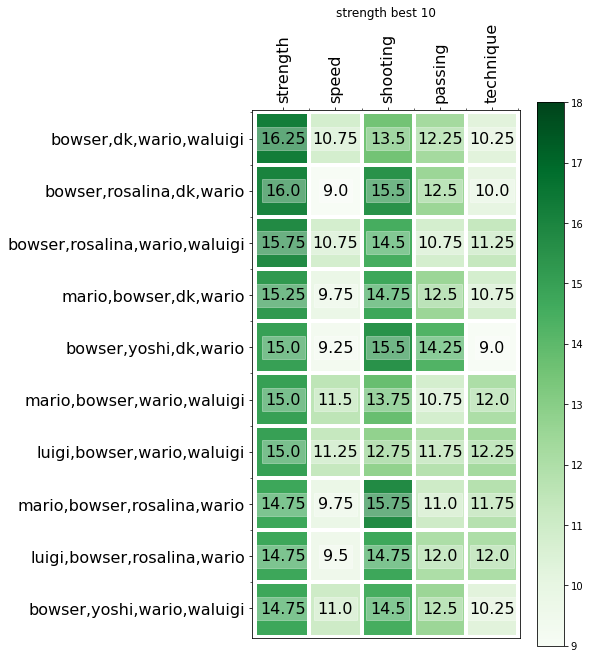

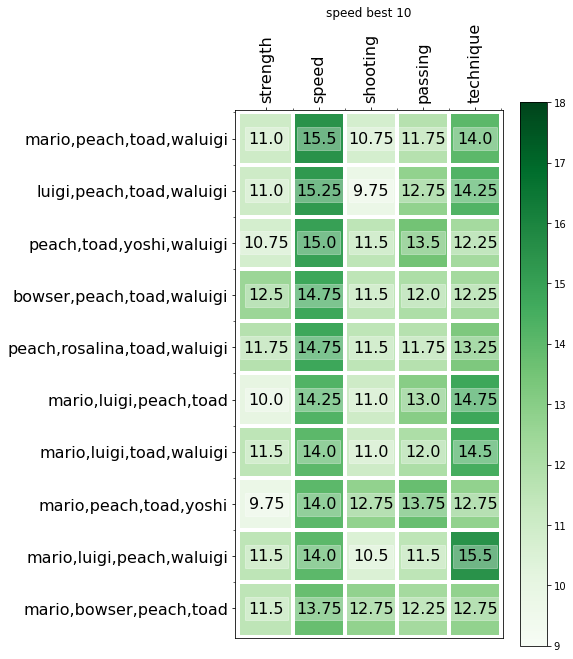

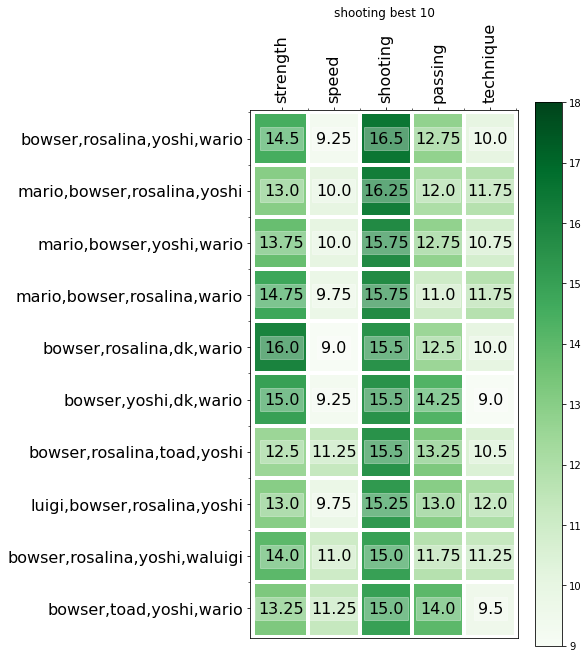

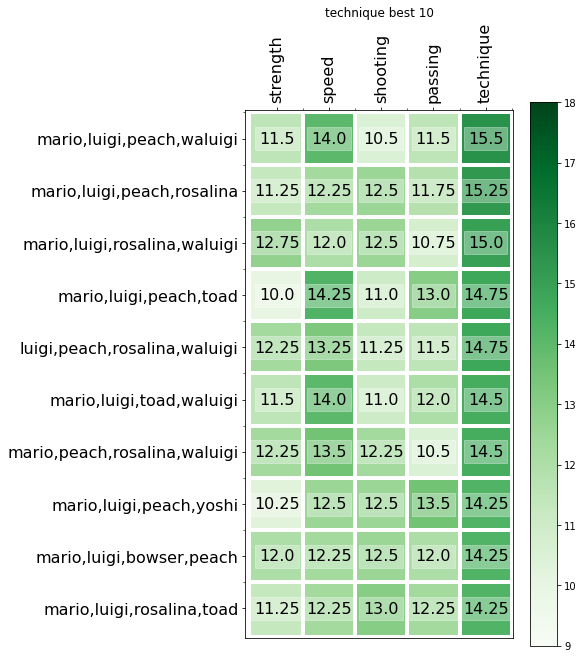

In [11]:
for c in df_teams_pareto:
  if c == 'passing':
    continue
  df_t = df_teams_pareto.sort_values(c, ascending=False).iloc[:10]
  df_t = df_t.sort_values(c)
  plt.figure(figsize=(6,10))
  plt.imshow(df_t, cmap='Greens')
  plt.yticks(ticks=range(len(df_t)), labels=df_t.index, fontsize=16)
  plt.xticks(ticks=range(len(df_t.columns)), labels=list(df_t.columns), rotation= 90, fontsize=16)
  plt.xlim(-0.6, len(df_t.columns) - 0.47)
  plt.ylim(-0.57, len(df_t) - 0.45)
  # https://stackoverflow.com/a/3376856
  plt.clim(9, 18)
  plt.colorbar()
  plt.title(c + ' best 10')

  for y in range(len(df_t)):
    for x in range(len(df_t.columns)):
      plt.text(x, y, df_t.iloc[y, x],
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=16,
        backgroundcolor='#FFF5',
        c = 'k'
      )

  #https://stackoverflow.com/a/38994970
  ax = plt.gca();

  # Minor ticks
  ax.set_xticks(np.arange(0.5, len(df_t.columns), 1), minor=True)
  ax.set_yticks(np.arange(0.5, len(df_t), 1), minor=True)

  # Gridlines based on minor ticks
  ax.grid(which='minor', color='w', linestyle='-', linewidth=4)

  #https://stackoverflow.com/questions/14406214/moving-x-axis-to-the-top-of-a-plot-in-matplotlib
  ax.xaxis.tick_top()
  plt.show()